# Linear Regression with JAX
Source: https://danielrothenberg.com/blog/2020/Sep/jax-first-steps-pt1/

In [7]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import jax.numpy as jnp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from jax import random

def make_key():
    """ Helper function to generate a key for jax's parallel PRNG 
    using standard numpy random functions. 

    """
    seed = np.random.randint(2**16 - 1)
    return random.PRNGKey(seed)

n = 100
rands = random.uniform(make_key(), shape=(n, ), minval=-1, maxval=1)

In [16]:
# We have to use functions to update an array unlike numpy as JAX does not mutate arrays in-place

x = jnp.ones((n, 2))
print(x)
x = x.at[:, 0].set(rands)
print(x)

[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]
[[-0.49573565  1.        ]
 [-0.75743556  1.        ]
 [-0.10826278  1.        ]
 [-0.06045723  1. 

# Simple first model

$$
    y = X\beta + \epsilon
$$

where $\beta = [\beta_0, \beta_1]$ where $\beta_0$ a slope relating x and y abd $\beta_1$ is an offset bias, and $\epsilon$ is an uncorrelated noise modeled as a normal distribution, $\mathcal{N}(0, 1)$.

In [17]:
# Fix our true slope and bias
slope, bias = 3.0, 2.0
beta_true = jnp.array((slope, bias))
eps = random.normal(make_key(), shape=(n,))

In [18]:
y = (x @ beta_true) + eps

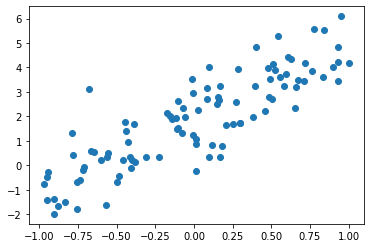

In [19]:
plt.scatter(x[:,0], y)

# Analytical Model Fitting


If the problem is simple enough, we can find a closed form analytical solution to the problem. We seek to find the $\beta$ that predicts the relationship between x and y. If we use $\mathcal{L}(\beta)=||\mathbf{X}\beta-\mathbf{Y}||$, the analytical solution is:

$$
    \frac{\partial \mathcal{L}(\beta)}{\partial \beta} = -2 \mathbf{Y}^T\mathbf{X}+2\beta^T\mathbf{X}^T\mathbf{X}
$$

And solving for 0 gives:

$$
\beta = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{Y}
$$

In [20]:
beta_ols = jnp.linalg.inv(x.T @ x) @ (x.T @ y)
print(beta_ols)

[2.9267178 1.855265 ]


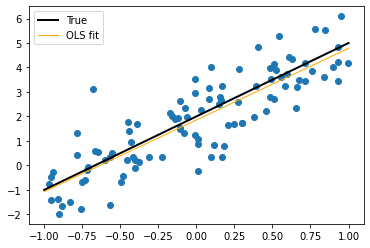

In [21]:
plt.scatter(x[:, 0], y)

xs = np.linspace(-1, 1)
xs = np.stack([xs, np.ones_like(xs)], axis=1)
ys_true = xs@beta_true
ys_fit = xs@beta_ols
plt.plot(xs[:, 0], ys_true, color='k', lw=2, label="True")
plt.plot(xs[:, 0], ys_fit, color='orange', lw=1, label='OLS fit')
plt.legend();

# TBC...